# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   

In [ ]:
#Созданные данным способом заполнятся нулями. Нам нужны вещественные числа,поэтому можно использовать rand()
#a = torch.FloatTensor(3, 4)
#b = torch.FloatTensor(12)
a = torch.rand(3, 4)
b = torch.rand(12)
a, b

(tensor([[0.7580, 0.7810, 0.5685, 0.2363],
         [0.4591, 0.0468, 0.2701, 0.8296],
         [0.7522, 0.6048, 0.0117, 0.9057]]),
 tensor([0.7392, 0.5577, 0.5198, 0.7744, 0.9225, 0.7376, 0.1351, 0.0131, 0.7863,
         0.1267, 0.1077, 0.0889]))

2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  

In [ ]:
c = b.view(2, 2, 3)
c

tensor([[[0.7392, 0.5577, 0.5198],
         [0.7744, 0.9225, 0.7376]],

        [[0.1351, 0.0131, 0.7863],
         [0.1267, 0.1077, 0.0889]]])

3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a[:, :1]

tensor([[0.7580],
        [0.4591],
        [0.7522]])

In [ ]:
#Можем вывести этот же столбец но уже в формате строки
a[:, 0]

tensor([0.7580, 0.4591, 0.7522])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   

In [ ]:
a = torch.rand(5, 2)
b = torch.rand(1, 10)
a, b

(tensor([[0.7182, 0.4050],
         [0.6204, 0.7472],
         [0.8674, 0.6903],
         [0.0296, 0.0859],
         [0.9788, 0.3880]]),
 tensor([[0.8461, 0.8174, 0.5288, 0.7076, 0.5362, 0.7380, 0.1920, 0.5557, 0.7742,
          0.3520]]))

2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  

In [ ]:
c = b.view(5, 2)
c

tensor([[0.8461, 0.8174],
        [0.5288, 0.7076],
        [0.5362, 0.7380],
        [0.1920, 0.5557],
        [0.7742, 0.3520]])

3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
#Сложение
a.add(c)

tensor([[1.5644, 1.2224],
        [1.1491, 1.4548],
        [1.4036, 1.4283],
        [0.2216, 0.6416],
        [1.7529, 0.7400]])

In [ ]:
#Вычитание
a.sub(c)

tensor([[-0.1279, -0.4124],
        [ 0.0916,  0.0395],
        [ 0.3311, -0.0476],
        [-0.1624, -0.4698],
        [ 0.2046,  0.0359]])

In [ ]:
#Умножение
a.mul(c)

tensor([[0.6077, 0.3310],
        [0.3280, 0.5287],
        [0.4651, 0.5094],
        [0.0057, 0.0477],
        [0.7577, 0.1366]])

In [ ]:
#Деление
a.div(c)

tensor([[0.8489, 0.4954],
        [1.1733, 1.0559],
        [1.6175, 0.9354],
        [0.1542, 0.1545],
        [1.2643, 1.1021]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). 

In [ ]:
white_rows = torch.ones(2, 200, 3) * 255
for i in range(100) :
    images[i, 2*i:2*(i+1)] = white_rows

Выведите несколько примеров с помощью `pylot` 

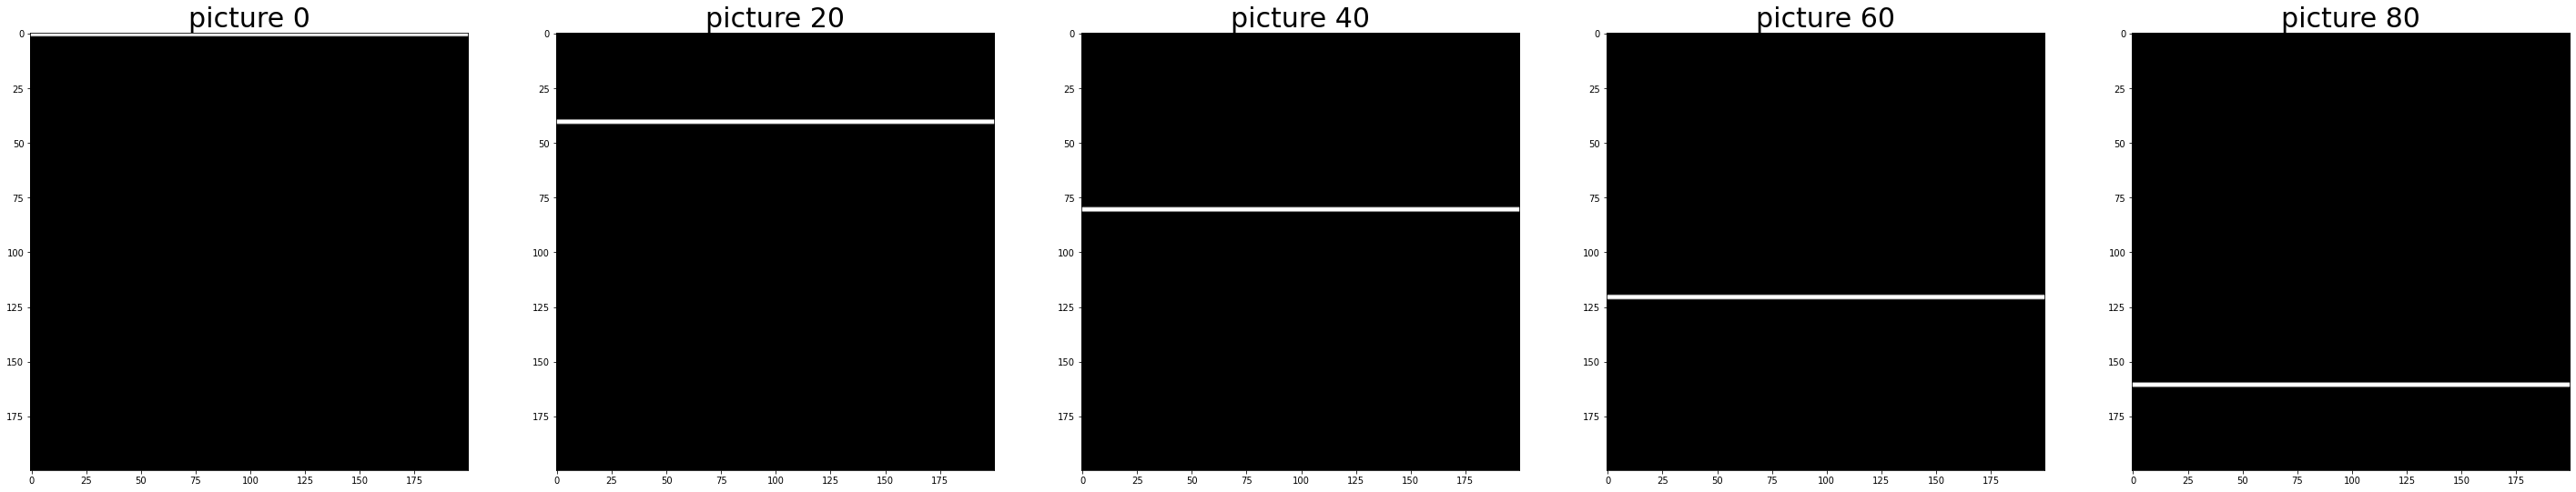

In [ ]:
fig = plt.figure(figsize=(50,120))

item = 1
for i in np.arange(0, 100, 20) :
    ax = fig.add_subplot(1, 5, item)
    item += 1
    imgplot = plt.imshow(images[i])
    ax.set_title('picture ' + str(i), fontsize=30)

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

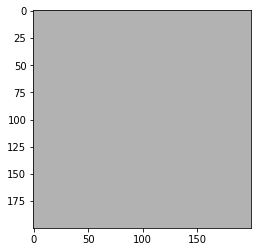

In [ ]:
mean_image = images.float().mean(0) * 70

fig = plt.figure()
imgplot = plt.imshow(mean_image.int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)

In [ ]:
import torch

In [ ]:
a = torch.FloatTensor(2, 3, 4).uniform_().cuda()
b = torch.FloatTensor(1, 8, 3).uniform_().cuda()
a, b

(tensor([[[0.5041, 0.8880, 0.2195, 0.8011],
          [0.8134, 0.1568, 0.6048, 0.1995],
          [0.0139, 0.0532, 0.4776, 0.5251]],
 
         [[0.9842, 0.0304, 0.1613, 0.6781],
          [0.1224, 0.6226, 0.3451, 0.2345],
          [0.5531, 0.6187, 0.7626, 0.2095]]], device='cuda:0'),
 tensor([[[0.6755, 0.8087, 0.6232],
          [0.7597, 0.9213, 0.3418],
          [0.7459, 0.6385, 0.5631],
          [0.0583, 0.5295, 0.0241],
          [0.5120, 0.8605, 0.3137],
          [0.9376, 0.4157, 0.5868],
          [0.4385, 0.4511, 0.8623],
          [0.4089, 0.6516, 0.6476]]], device='cuda:0'))

- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  

In [ ]:
c = b.view(a.shape)
c

tensor([[[0.6755, 0.8087, 0.6232, 0.7597],
         [0.9213, 0.3418, 0.7459, 0.6385],
         [0.5631, 0.0583, 0.5295, 0.0241]],

        [[0.5120, 0.8605, 0.3137, 0.9376],
         [0.4157, 0.5868, 0.4385, 0.4511],
         [0.8623, 0.4089, 0.6516, 0.6476]]], device='cuda:0')

In [ ]:
a.shape == c.shape

True

- Переместите `c` на CPU, переместите `a` на CPU

In [ ]:
from torch.autograd import Variable

In [ ]:
a = a.cpu()
c = c.cpu()
a, c

(tensor([[[0.5041, 0.8880, 0.2195, 0.8011],
          [0.8134, 0.1568, 0.6048, 0.1995],
          [0.0139, 0.0532, 0.4776, 0.5251]],
 
         [[0.9842, 0.0304, 0.1613, 0.6781],
          [0.1224, 0.6226, 0.3451, 0.2345],
          [0.5531, 0.6187, 0.7626, 0.2095]]]),
 tensor([[[0.6755, 0.8087, 0.6232, 0.7597],
          [0.9213, 0.3418, 0.7459, 0.6385],
          [0.5631, 0.0583, 0.5295, 0.0241]],
 
         [[0.5120, 0.8605, 0.3137, 0.9376],
          [0.4157, 0.5868, 0.4385, 0.4511],
          [0.8623, 0.4089, 0.6516, 0.6476]]]))

In [ ]:
c.is_cuda, a.is_cuda

(False, False)

- Оберните их в `Variable()`

In [ ]:
a = Variable(a, requires_grad=False)
c = Variable(c, requires_grad=True)

- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$

In [ ]:
L = torch.mean((c - a)**2)
L.backward()

- Выведите градиент `L` по `c`

In [ ]:
c.grad

tensor([[[ 0.0143, -0.0066,  0.0336, -0.0034],
         [ 0.0090,  0.0154,  0.0118,  0.0366],
         [ 0.0458,  0.0004,  0.0043, -0.0418]],

        [[-0.0393,  0.0692,  0.0127,  0.0216],
         [ 0.0244, -0.0030,  0.0078,  0.0180],
         [ 0.0258, -0.0175, -0.0092,  0.0365]]])